<a href="https://colab.research.google.com/github/ibonetc/BIIntroduction/blob/master/Copia_de_ClasificarImagenes_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo sencillo utilizando TensorFlow
Aquí se entrena una red neuronal para clasificar imágenes de ropa.
Se utiliza ***tf.keras***, una API para construir modelos en TensorFlow

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


## Base de datos MNIST
Esta base de datos tiene varias imágenes de 10 tipos de ropa:

<table>
  <tr>
    <th>Label</th>    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>    <td>Ankle boot</td> 
  </tr>
</table>

La base tiene 60000 ejemplos de entrenamiento y 10000 de prueba.
Al descargar esta base de datos se retornan 4 arreglos Numpy:

Arreglo con imágenes de entrenamiento
Arreglo con clases de entrenamiento
Arreglo con imágenes de prueba
Arreglo con clases de imágenesde prueba
Las imágenes son de 28x28 pixeles, los que tienen valores en un rango de 0 a 255.


Al descargar esta base de datos se retornan 4 arreglos Numpy:


1.   Arreglo con imágenes de entrenamiento
2.   Arreglo con clases de entrenamiento
3.   Arreglo con imágenes de prueba
4.   Arreglo con clases de imágenesde prueba

Las imágenes son de 28x28 pixeles, los que tienen valores en un rango de 0 a 255.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Explorando los datos:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
print(len(train_labels))
print(len(test_labels))

60000
10000


Mostrar la primera imagen de entrenamiento:

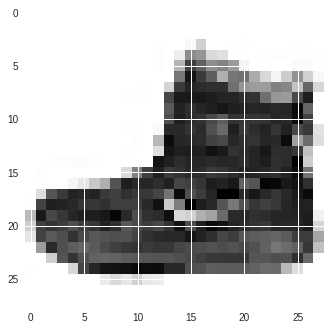

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.show()

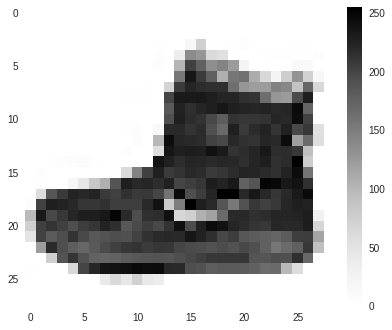

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Mostrando las primeras 100

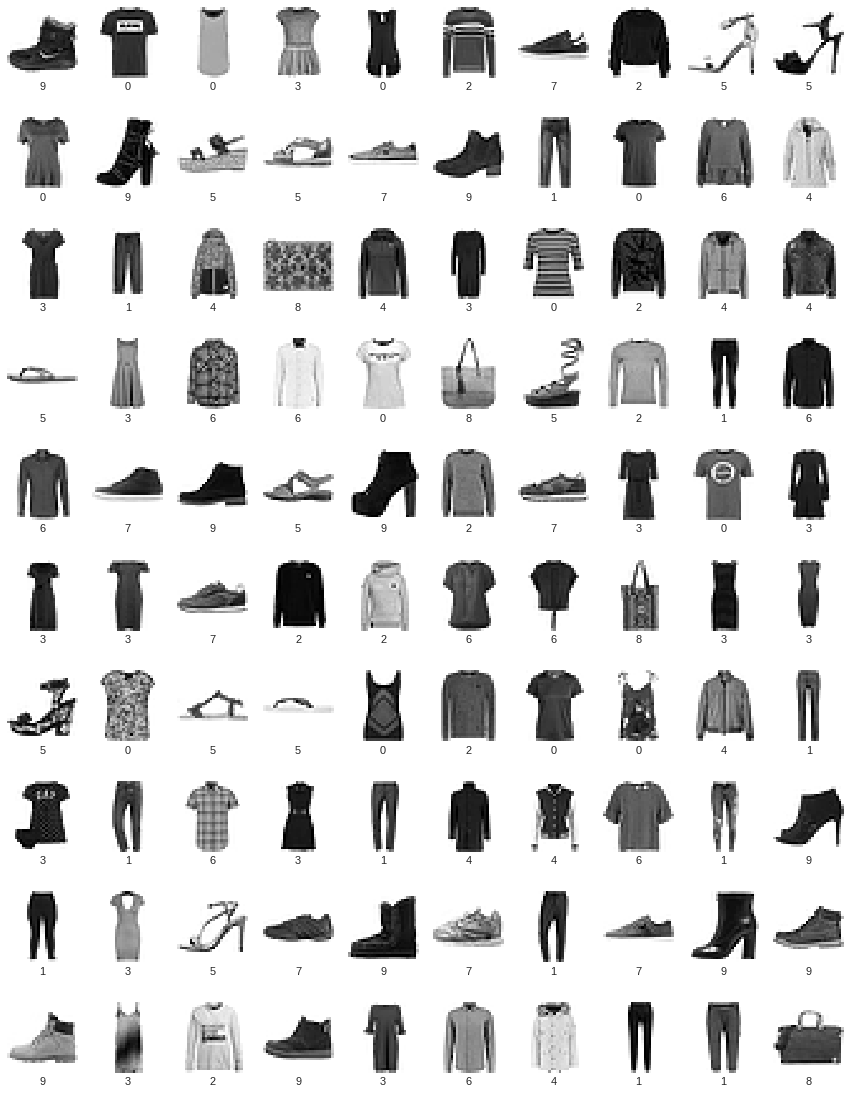

In [9]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Necesitamos un arreglo con el nombre asociado para cada una de las clases

In [0]:
class_names_english = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Botín']

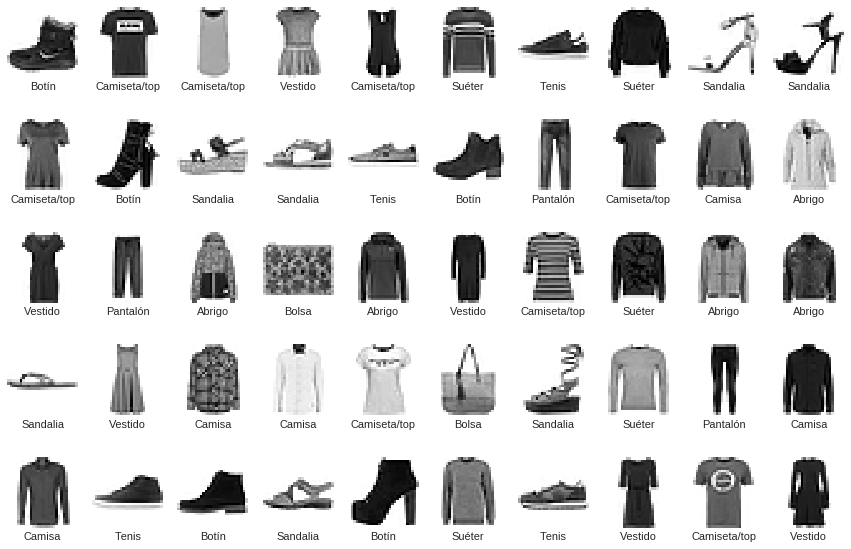

In [12]:
plt.figure(figsize=(15,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Debemos llevar las imágenes de la escala de 0-255 a una escala entre 0 y 1

Veamos originalmente cómo es la imagen y cómo es después de escalada.

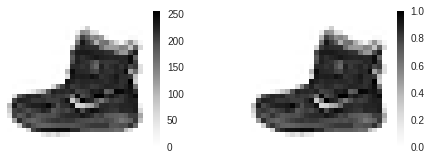

In [13]:
plt.figure()

plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0])
plt.colorbar()

plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0]/255.0)
plt.colorbar()

plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Construir el modelo de red neuronal
En este ejemplo vamos a utilizar *keras* que es un API desde la que se puede utilizar *tensorflow* con mayor facildiad.

Hay que definir las capas que tendrá la red neural. Existen diferentes tipos de capas.

Por ejemplo, para este modelo vamos a comenzar con uan capa de tipo Flatten (*tf.keras.layers.Flatten*), este tipo de capa transforma el formato de las imágenes de una matriz 2d (de 28 x 28 píxeles) a una matriz 1d de 28 * 28 = 784 píxeles.

Otro tipo de capa es la Dense (*tf.keras.layers.Dense*).  Estas son capas neuronales totalmente conectadas. 
En el ejemplo vamos a poner una capa Dense con 128 neuronas. 
La última capa, que es la que está relacionada con la salidad de la red neuronal, tiene 10 neuronas (una por cada una de las clases) y con función de activación  *softmax*.
Esta red devuelve una matriz de 10 puntuaciones de probabilidad que suman 1, cada una asociada con una clase. 



In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 128 neuronas con función de activación relu
    keras.layers.Dense(128, activation=tf.nn.relu),
    # 10 neuronas de salidad con función de activación softmax
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

Instructions for updating:
Colocations handled automatically by placer.


Antes de que el modelo esté listo para el entrenamiento, necesita algunos ajustes más. Estos se agregan durante el paso *compilación* del modelo:

* *Función de pérdida*: mide la precisión del modelo durante el entrenamiento. Queremos minimizar esta función para llevar el modelo en la dirección correcta.
* *Optimizador*: así se actualiza el modelo según los datos que ve y su función de pérdida.
* *Métricas*: se utiliza para supervisar los pasos de capacitación y pruebas. El siguiente ejemplo utiliza * precision *, la fracción de las imágenes que están clasificadas correctamente.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


Entrenar el modelo de red neuronal requiere los siguientes pasos:

1. Entrar los datos de entrenamiento al modelo; en este ejemplo, los arreglos *train_images* y *train_labels*.
2. El modelo aprende a asociar imágenes y clases.
3. Le pedimos al modelo que haga predicciones sobre un conjunto de pruebas; en este ejemplo, la matriz *test_images*. Verificamos que las predicciones coincidan con las clases de la matriz *test_labels*.

Para comenzar el entrenamiento, llame al método `model.fit`: 

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])

batch_stats = CollectBatchStats()

In [39]:
history=model.fit(train_images, train_labels, epochs=5, callbacks = [batch_stats])

Epoch 1/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2293 - acc: 0.9142
Epoch 2/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2195 - acc: 0.9186
Epoch 3/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2143 - acc: 0.9206
Epoch 4/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2068 - acc: 0.9229
Epoch 5/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2020 - acc: 0.9244


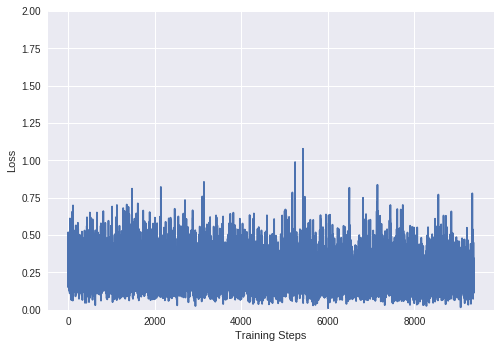

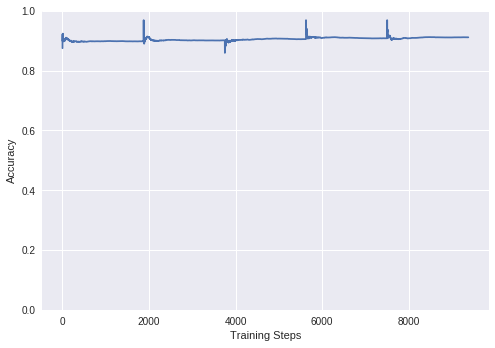

In [36]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

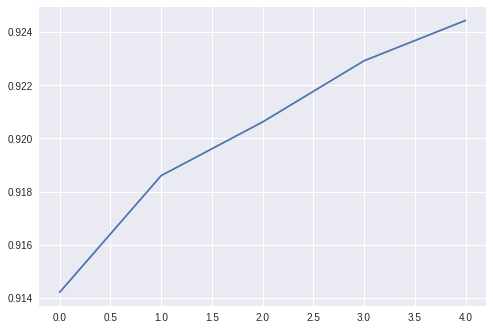

In [43]:
from matplotlib import pyplot
pyplot.plot(history.history['acc'])

## Evaluar el modelo

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.3483 - acc: 0.8724


## Predecir ejemplos

In [0]:
predictions = model.predict(test_images)

`predictions` es un arreglo con la probabilidad de pertenecer a cada una de las clases, para cada uno de los casos en el arreglo de `test_images`.

In [20]:
predictions[0]

array([1.0660696e-05, 4.6370460e-06, 3.8913863e-06, 6.5341332e-08,
       1.6294476e-06, 3.4693675e-03, 4.0994787e-06, 3.8859639e-02,
       5.8158788e-05, 9.5758790e-01], dtype=float32)

De forma que el mayor será el correspondiente a la clase

In [21]:
np.argmax(predictions[0])

9

Text(0.5, 0, 'Abrigo 79% (Abrigo)')

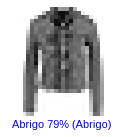

In [22]:
  index_image=10
  plt.figure(figsize=(2,2))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[index_image], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions[index_image])
  if predicted_label == test_labels[index_image]:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions[index_image]),
                                class_names[test_labels[index_image]]),
                                color=color)

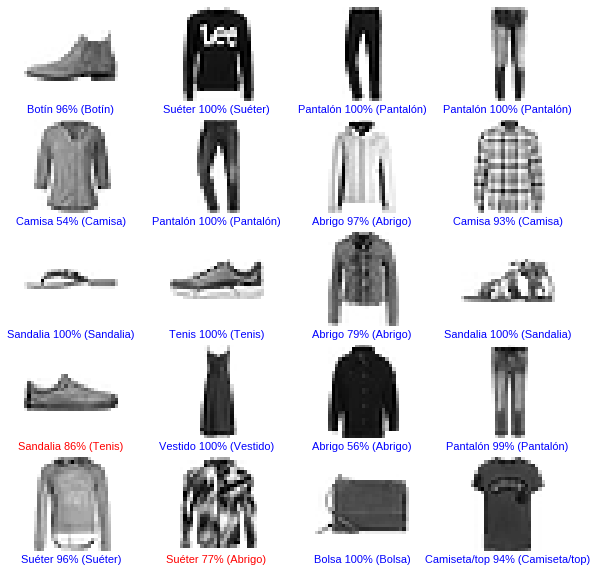

In [23]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[index_image], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[index_image])
  if predicted_label == test_labels[index_image]:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions[index_image]),
                                class_names[test_labels[index_image]]),
                                color=color)

### Predecir una sola imagen
Si tenemos una imagen y queremos usar este modelo para predecirla, entonces debemos primero poner la imagen un formato para poder ser predicha

In [24]:
img = test_images[0]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.0660696e-05 4.6370501e-06 3.8913827e-06 6.5341332e-08 1.6294491e-06
  3.4693689e-03 4.0994710e-06 3.8859613e-02 5.8158788e-05 9.5758790e-01]]


In [26]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


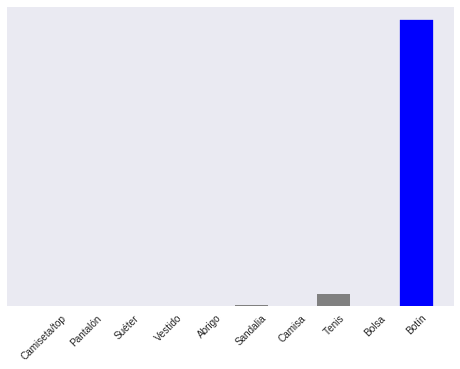

In [27]:
plt.grid(False)
thisplot = plt.bar(range(10), predictions_single[0], color="gray")
plt.ylim([0, 1]) 
predicted_label = np.argmax(predictions_single[0])
thisplot[predicted_label].set_color('red')
thisplot[test_labels[0]].set_color('blue')
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
plt.show()

## Guardar el modelo

In [0]:
model.save('my_model.h5')

## Volver a cargar el modelo

In [29]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Probando el modelo cargado

In [31]:
loss, acc = new_model.evaluate(train_images, train_labels)
print("Modelo cargado, accuracy: {:5.2f}%".format(100*acc))

60000/60000 [==============================] - 4s 62us/sample - loss: 0.2756 - acc: 0.8981
Modelo cargado, accuracy: 89.81%


Si queremos descargar el modelo creado:

In [0]:
from google.colab import files
files.download('my_model.h5')

Para volver a cargarlo desde el disco

In [0]:
from google.colab import files
uploaded = files.upload()